<a href="https://colab.research.google.com/github/JohnSili/NovosibCFP/blob/main/%D1%86%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D1%80%D1%8B%D0%B2_%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D0%B8%D0%B1%D0%B8%D1%80%D1%81%D0%BA%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train_dataset_luggage/last_combo.csv')
df[]

In [12]:
df = df.drop(['MessageReceivedDate',	'MessageProcessedDate',	'DateEvent', 'Unnamed: 0'], axis=1)

KeyError: ignored

In [14]:
df = df.drop(['Unnamed: 0'], axis=1)

In [16]:
df['ts'] = pd.to_datetime(df['ts'])

# Извлечение дня недели, часа и минуты
df['Weekday_reg'] = df['ts'].dt.weekday
df['Hour_reg'] = df['ts'].dt.hour
df['Minute_reg'] = df['ts'].dt.minute

In [24]:
features = ['departure_terminal_encoded','checkin_terminal_encoded','Weekday_reg', 'Hour_reg','Minute_reg', 'DayTime','local_or_transfer_binary','config']
target = ['VolumePerMinute','pax_arrival_profile']

X = df[features]
y = df[target]

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Создание и обучение модели для прогнозирования y
y_model = RandomForestRegressor(random_state=42)
y_model.fit(X, y)
y_pred = y_model.predict(X)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Рассчитываем метрики
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 11.847606375691498
MSE: 617.6594180922006
RMSE: 24.852754738503346


In [28]:
from sklearn.ensemble import IsolationForest

# Создание и обучение модели для поиска аномалий в X
anomaly_model = IsolationForest(contamination=0.05, random_state=42)
anomaly_pred = anomaly_model.fit_predict(X)
anomalies_X = X[anomaly_pred == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


ValueError: ignored

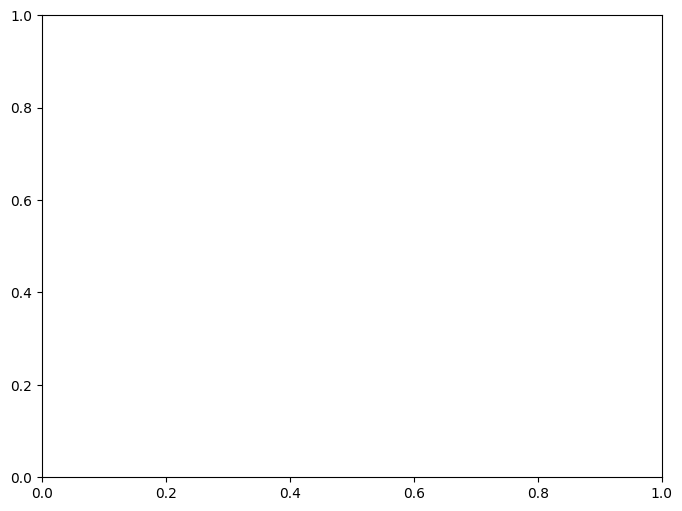

In [30]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Создание и обучение модели для поиска аномалий в X
anomaly_model = IsolationForest(contamination=0.05, random_state=42)
anomaly_pred = anomaly_model.fit_predict(X)
anomalies_X = X[anomaly_pred == -1]


In [32]:
for feature in X.columns:
    print(f'Shape of X[feature]: {X[feature].shape}')
    print(f'Shape of y_pred: {y_pred.shape}')

Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)
Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)
Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)
Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)
Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)
Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)
Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)
Shape of X[feature]: (2088570,)
Shape of y_pred: (2088570, 2)


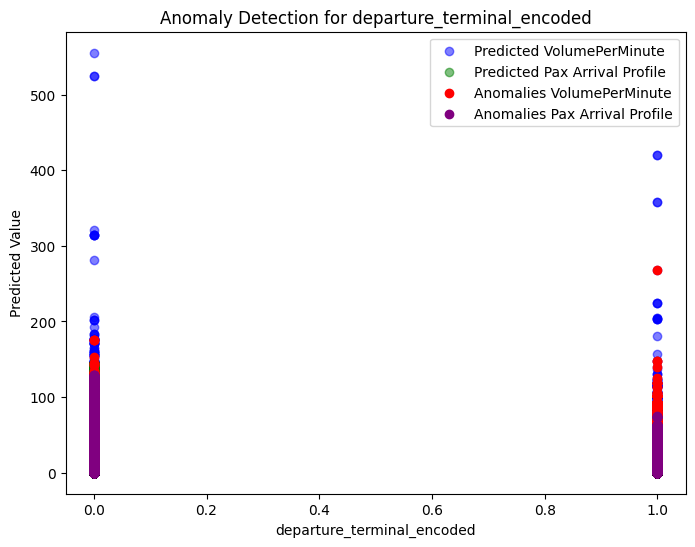

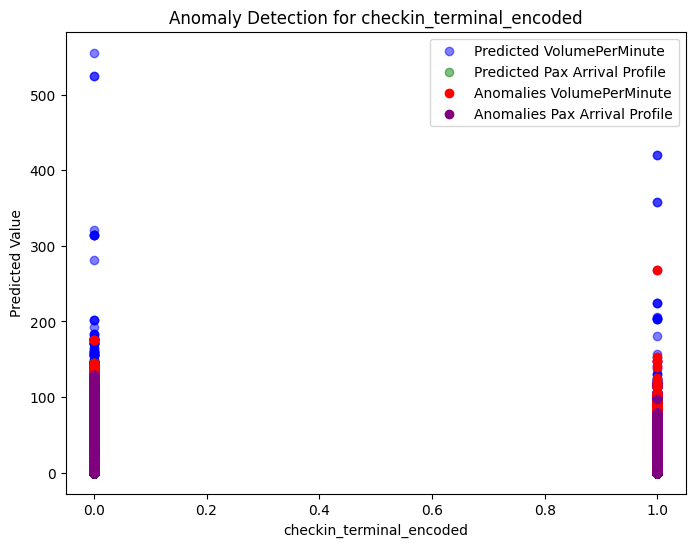

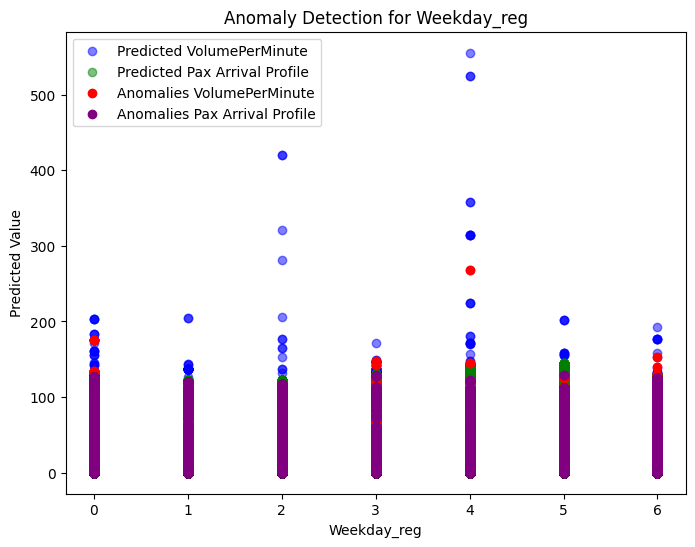

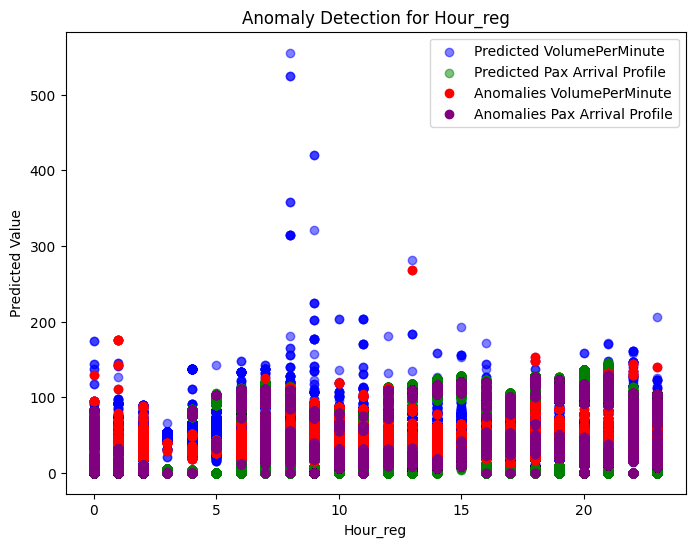

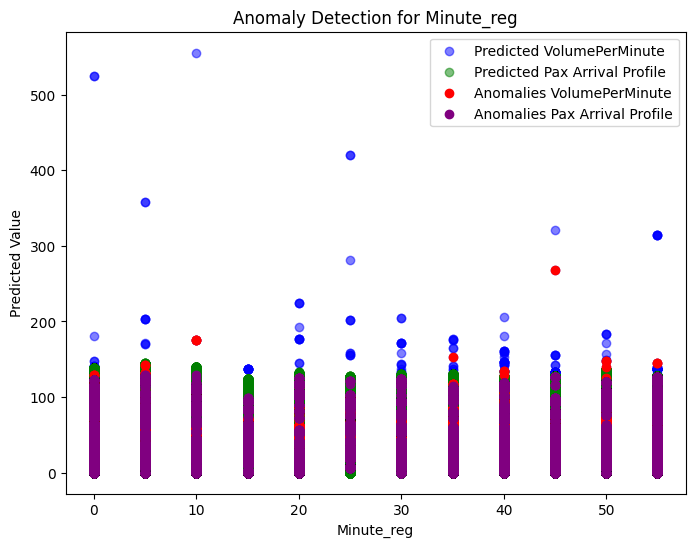

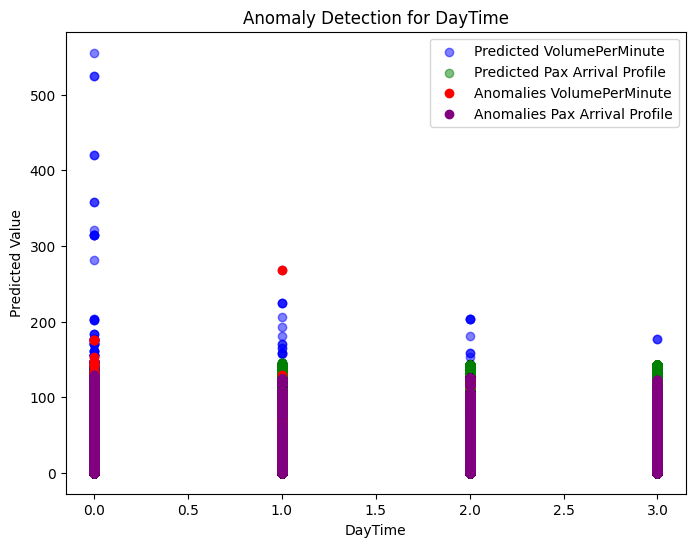

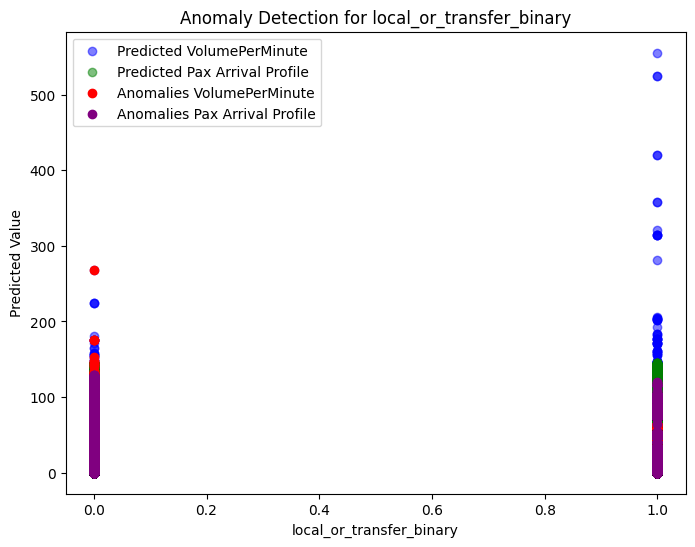

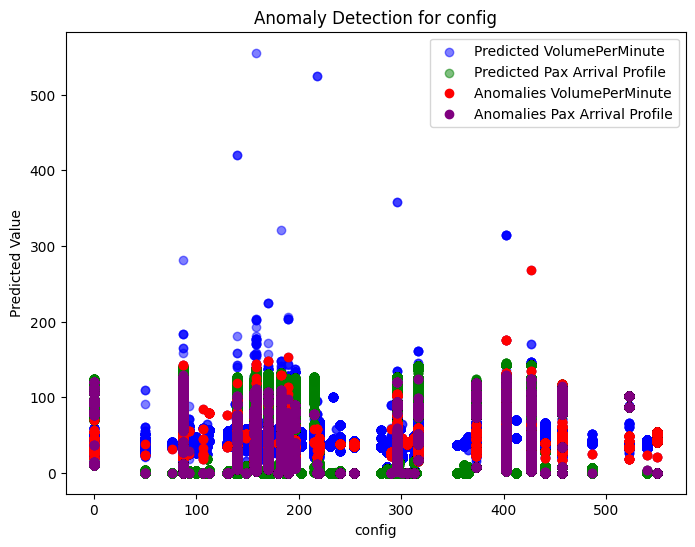

In [34]:
# Перебор по признакам и визуализация аномалий
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y_pred[:, 0], c='blue', alpha=0.5, label='Predicted VolumePerMinute')
    plt.scatter(X[feature], y_pred[:, 1], c='green', alpha=0.5, label='Predicted Pax Arrival Profile')
    plt.scatter(anomalies_X[feature], y_pred[anomaly_pred == -1][:, 0], c='red', label='Anomalies VolumePerMinute')
    plt.scatter(anomalies_X[feature], y_pred[anomaly_pred == -1][:, 1], c='purple', label='Anomalies Pax Arrival Profile')
    plt.xlabel(feature)
    plt.ylabel('Predicted Value')
    plt.title(f'Anomaly Detection for {feature}')
    plt.legend()
    plt.show()

In [23]:
df['pax_arrival_profile'].describe()

count    2.088570e+06
mean     5.506447e+01
std      4.321464e+01
min      0.000000e+00
25%      1.100000e+01
50%      5.400000e+01
75%      9.700000e+01
max      1.460000e+02
Name: pax_arrival_profile, dtype: float64

In [36]:
!pip install joblib

In [39]:
import joblib

# Сохранение модели для прогнозирования y
joblib.dump(y_model, '/content/drive/MyDrive/train_dataset_luggage/модельки/y_model.pkl')

# Сохранение модели для поиска аномалий в X
joblib.dump(anomaly_model, '/content/drive/MyDrive/train_dataset_luggage/модельки/anomaly_model.pkl')

['/content/drive/MyDrive/train_dataset_luggage/модельки/anomaly_model.pkl']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Разбиение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка модели с использованием MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

KeyboardInterrupt: ignored

In [19]:
вводим данные 2 сентября, выводим основные y, + по желанию пользователя добавляем инфу о том, какие из x аномально повлияли на y, добавить буквами что пассажиропток такой то,

,ident_bag,i_id,pax_id_hash,TagNumber,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,m_city_rus1,...,ts,pax_arrival_profile,departure_terminal_encoded,checkin_terminal_encoded,Weekday of Message,Hour of Message,DayTime,Weekday_reg,Hour_reg,Minute_reg
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2425399448,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,Москва,...,2023-07-01 07:30:00,41.0,0,1,5,6,1,5,7,30
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2425388102,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,Москва,...,2023-07-01 07:30:00,41.0,0,1,5,6,1,5,7,30
2,62585837,8628981.0,d1deb9ad74e154bd45625253d3192aec,425411640,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,Москва,...,2023-07-01 07:30:00,41.0,0,1,5,4,1,5,7,30
3,62585932,8628981.0,edfb80134c7e09bc74dfeead90097018,425411641,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,Москва,...,2023-07-01 07:30:00,41.0,0,1,5,4,1,5,7,30
4,62585968,8628981.0,a784df5b95726a8e444007c37de942fc,425411642,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,Москва,...,2023-07-01 07:30:00,41.0,0,1,5,4,1,5,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088565,64615995,8688438.0,8abc5aeddc92a35d53a4406597d3c860,555415885,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,270edd69788dce200a3b395a6da6fdb7,Москва,...,2023-09-01 22:25:00,83.0,0,0,3,23,0,4,22,25
2088566,64615997,8688438.0,8abc5aeddc92a35d53a4406597d3c860,555406113,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,270edd69788dce200a3b395a6da6fdb7,Москва,...,2023-09-01 22:25:00,83.0,0,0,3,23,0,4,22,25
2088567,64616074,8687786.0,6ed0e41f175ef54a9b06f0dbab62e870,5115349914,C,C,1af89fed0bc8bd12f596dd0bc5507bde,1af89fed0bc8bd12f596dd0bc5507bde,3d2d8ccb37df977cb6d9da15b76c3f3a,Москва,...,2023-09-01 02:55:00,0.0,1,1,3,23,0,4,2,55
2088568,64616154,8687786.0,2acb4b86315d6e49efc0a824b3cba80d,7115420782,C,C,1af89fed0bc8bd12f596dd0bc5507bde,1af89fed0bc8bd12f596dd0bc5507bde,3d2d8ccb37df977cb6d9da15b76c3f3a,Москва,...,2023-09-01 02:55:00,0.0,1,1,3,23,0,4,2,55


Матрица корелляции двух первых файлов
Откинуть ненужные
Сделать пятиминутны интервал, плюс день
Затем добавить третий файл к объединению
и y pax